# 높은 수익을 내는 게임을 개발해보자


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 전처리 과정


In [ ]:
data = '/content/drive/MyDrive/vgsales.csv'

df = pd.read_csv(data) #데이터셋 불러오기
df = df.drop(columns='Rank') #불필요한 열 삭제
df.info() #Year, Publisher에 결측치가 있음 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [ ]:
# 연도, 제작사에 대해 결측치를 대체할 수 있는 것이 없다고 판단 
# 결측치 제거

df =df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


# 2012년 이후 지역별 판매량



In [ ]:
a = 0 # 2012년 이후 북미지역 판매량

for i in range(0, 16291) :
  if df['Year'].values[i] >= 2012 :
    a += df['NA_Sales'].values[i]
print(a)

567.4199999999926


In [ ]:
a2 = 0 # 2012년 이후 유럽지역 판매량

for i in range(0, 16291) :
  if df['Year'].values[i] >= 2012 :
    a2 += df['EU_Sales'].values[i]
print(a2)

494.6599999999946


In [ ]:
a3 = 0 # 2012년 이후 일본지역 판매량

for i in range(0, 16291) :
  if df['Year'].values[i] >= 2012 :
    a3 += df['JP_Sales'].values[i]
print(a3)

186.23000000000104


In [ ]:
a4 = 0 #2012년 이후 그 외 지역 판매량

for i in range(0, 16291) :
  if df['Year'].values[i] >= 2012 :
    a4 += df['Other_Sales'].values[i]
print(a4)

155.43999999999883


# 2012년 이후 지역별 선호 장르

선호한다 = 출고량이 많다라고 판단

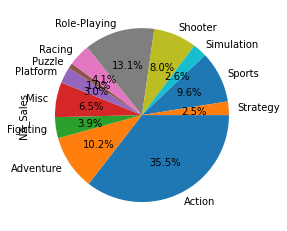

In [ ]:
gys = df[['Genre','Year','NA_Sales']]
gys2 = gys.loc[gys['Year'] >= 2012]
gys2 = gys2.reset_index()
gys2 = gys2.drop(['index'],axis=1)
gys2 = gys2.drop(['Year'],axis=1)
gys2['NA_Sales'].groupby(gys2['Genre']).count().plot.pie(autopct='%.1f%%', counterclock=False)

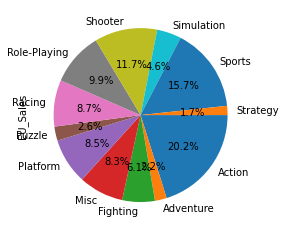

In [ ]:
gys3 = df[['Genre','Year','EU_Sales']]
gys4 = gys3.loc[gys3['Year'] >= 2012]
gys4 = gys4.reset_index()
gys4 = gys4.drop(['index'],axis=1)
gys4 = gys4.drop(['Year'],axis=1)
gys4['EU_Sales'].groupby(gys3['Genre']).count().plot.pie(autopct='%.1f%%', counterclock=False)

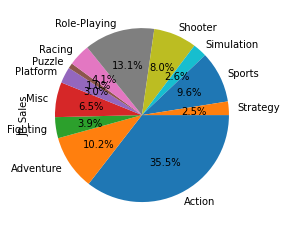

In [ ]:
gys5 = df[['Genre','Year','JP_Sales']]
gys6 = gys5.loc[gys5['Year'] >= 2012]
gys6 = gys6.reset_index()
gys6 = gys6.drop(['index'],axis=1)
gys6 = gys6.drop(['Year'],axis=1)
gys6['JP_Sales'].groupby(gys6['Genre']).count().plot.pie(autopct='%.1f%%', counterclock=False)

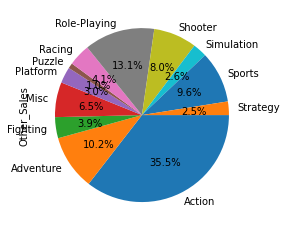

In [ ]:
gys7 = df[['Genre','Year','Other_Sales']]
gys8 = gys7.loc[gys7['Year'] >= 2012]
gys8 = gys8.reset_index()
gys8 = gys8.drop(['index'],axis=1)
gys8 = gys8.drop(['Year'],axis=1)
gys8['Other_Sales'].groupby(gys8['Genre']).count().plot.pie(autopct='%.1f%%', counterclock=False)

# 연도별 게임의 트렌드가 있을까

In [ ]:
year = df['Year']
genre = df['Genre']
yg = pd.concat([year,genre], axis=1)
yg

,Year,Genre
0,2006.0,Sports
1,1985.0,Platform
2,2008.0,Racing
3,2009.0,Sports
4,1996.0,Role-Playing
...,...,...
16593,2002.0,Platform
16594,2003.0,Shooter
16595,2008.0,Racing
16596,2010.0,Puzzle


In [ ]:
def choice(year, genre):                      #0000년도에 00장르의 게임이 몇개 발매되었는지 알아보기위한 함수
  a = yg.loc[yg['Year'] == year]
  b = a.loc[yg['Genre'] == genre]
  return len(b)

In [ ]:
years = list(range(1980, 2018))              #0000년도에 00장르의 게임이 몇개 발매되었는지 보기 쉽게 데이터프레임으로 제작
years = years + [2020]
genres = ['Action','Role-Playing','Sports','Shooter','Racing','Platform','Strategy','Fighting','Misc','Adventure','Simulation','Puzzle']

ygs = [(year, genre) for year in years for genre in genres]

adf = pd.DataFrame(index = years, columns= genres, dtype=int)

for y, g in ygs:
  result = choice(y, g) 
  adf.loc[y,g] = result

In [ ]:
adf

,Action,Role-Playing,Sports,Shooter,Racing,Platform,Strategy,Fighting,Misc,Adventure,Simulation,Puzzle
1980,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
1981,25.0,0.0,4.0,10.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0
1982,18.0,0.0,2.0,5.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,3.0
1983,7.0,0.0,1.0,1.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,1.0
1984,1.0,0.0,2.0,3.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0
1985,2.0,0.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,4.0
1986,6.0,1.0,3.0,4.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,2.0,3.0,4.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0
1988,2.0,3.0,2.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0
1989,2.0,2.0,3.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,5.0


In [ ]:
adf.iloc[27:-2] #최근 10년의 데이터

,Action,Role-Playing,Sports,Shooter,Racing,Platform,Strategy,Fighting,Misc,Adventure,Simulation,Puzzle
2007,211.0,103.0,167.0,85.0,86.0,42.0,67.0,50.0,150.0,84.0,90.0,66.0
2008,221.0,112.0,200.0,83.0,82.0,62.0,50.0,57.0,212.0,166.0,119.0,64.0
2009,272.0,103.0,184.0,91.0,84.0,29.0,65.0,53.0,207.0,141.0,123.0,79.0
2010,226.0,103.0,186.0,81.0,57.0,31.0,53.0,40.0,201.0,154.0,80.0,45.0
2011,239.0,95.0,122.0,94.0,64.0,37.0,45.0,50.0,184.0,108.0,55.0,43.0
2012,265.0,78.0,54.0,48.0,30.0,11.0,15.0,29.0,38.0,58.0,18.0,11.0
2013,148.0,71.0,53.0,59.0,16.0,37.0,19.0,20.0,42.0,60.0,18.0,3.0
2014,186.0,90.0,55.0,47.0,27.0,10.0,8.0,23.0,41.0,75.0,11.0,7.0
2015,255.0,78.0,62.0,34.0,19.0,14.0,17.0,21.0,39.0,54.0,15.0,6.0
2016,118.0,40.0,38.0,32.0,20.0,10.0,10.0,14.0,18.0,33.0,9.0,0.0


In [ ]:
years2 = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

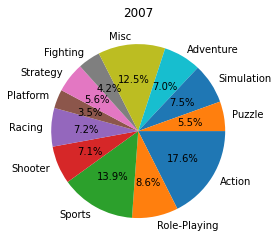

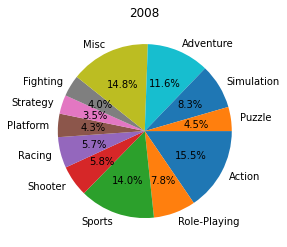

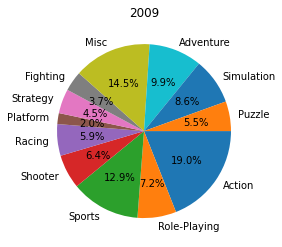

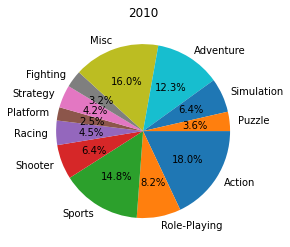

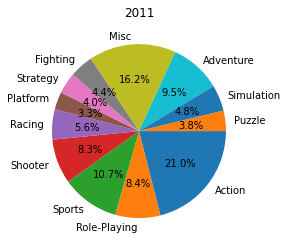

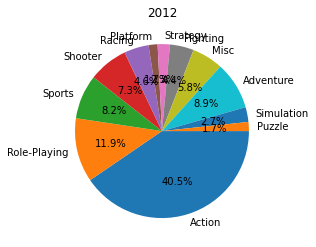

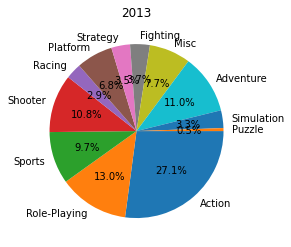

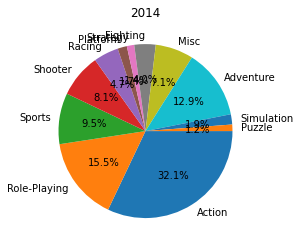

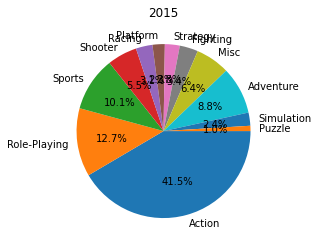

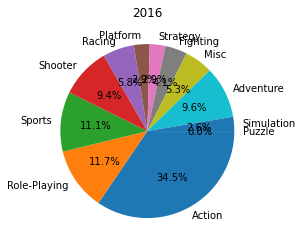

In [ ]:
for i in years2:
  plt.pie(adf.loc[i], labels=adf.columns, autopct='%.1f%%', counterclock=False)
  plt.title(i)
  plt.show()  # 최근 10년간 장르별 판매량

#최근 많이 사용되는 플랫폼 




In [ ]:
Gpydf = df[['Platform','Year']]
pydf

,Platform,Year
0,Wii,2006.0
1,NES,1985.0
2,Wii,2008.0
3,Wii,2009.0
4,GB,1996.0
...,...,...
16593,GBA,2002.0
16594,GC,2003.0
16595,PS2,2008.0
16596,DS,2010.0


In [ ]:
pydf2 = pydf.loc[pydf['Year'] == 2012]
pydf2 = pydf2.reset_index()
pydf2 = pydf2.drop(['index'],axis=1)
pydf2

,Platform,Year
0,PS3,2012.0
1,X360,2012.0
2,3DS,2012.0
3,X360,2012.0
4,3DS,2012.0
...,...,...
650,PS3,2012.0
651,PSP,2012.0
652,PC,2012.0
653,PSP,2012.0


In [ ]:
pydf3 = pydf.loc[pydf['Year'] == 2013]
pydf3 = pydf3.reset_index()
pydf3 = pydf3.drop(['index'],axis=1)
pydf3

,Platform,Year
0,PS3,2013.0
1,X360,2013.0
2,3DS,2013.0
3,X360,2013.0
4,PS3,2013.0
...,...,...
541,3DS,2013.0
542,PSP,2013.0
543,PSP,2013.0
544,3DS,2013.0


In [ ]:
pydf4 = pydf.loc[pydf['Year'] == 2014]
pydf4 = pydf4.reset_index()
pydf4 = pydf4.drop(['index'],axis=1)
pydf4

,Platform,Year
0,PS4,2014.0
1,3DS,2014.0
2,PS4,2014.0
3,3DS,2014.0
4,WiiU,2014.0
...,...,...
575,XOne,2014.0
576,PSP,2014.0
577,PSV,2014.0
578,PSV,2014.0


In [ ]:
pydf5 = pydf.loc[pydf['Year'] == 2015]
pydf5 = pydf5.reset_index()
pydf5 = pydf5.drop(['index'],axis=1)
pydf5

,Platform,Year
0,PS4,2015.0
1,PS4,2015.0
2,PS4,2015.0
3,XOne,2015.0
4,PS4,2015.0
...,...,...
609,PSV,2015.0
610,3DS,2015.0
611,3DS,2015.0
612,PSV,2015.0


In [ ]:
pydf6 = pydf.loc[pydf['Year'] == 2016]
pydf6 = pydf6.reset_index()
pydf6 = pydf6.drop(['index'],axis=1)
pydf6

,Platform,Year
0,PS4,2016.0
1,PS4,2016.0
2,PS4,2016.0
3,PS4,2016.0
4,XOne,2016.0
...,...,...
337,XOne,2016.0
338,XOne,2016.0
339,PS4,2016.0
340,XOne,2016.0


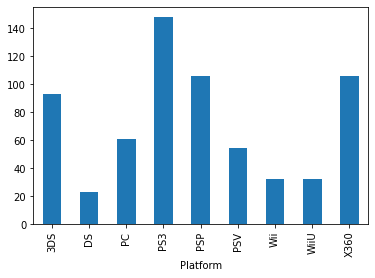

In [ ]:
pydf2['Year'].groupby(pydf2['Platform']).count().plot.bar()

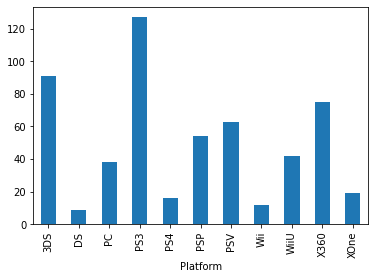

In [ ]:
pydf3['Year'].groupby(pydf3['Platform']).count().plot.bar()

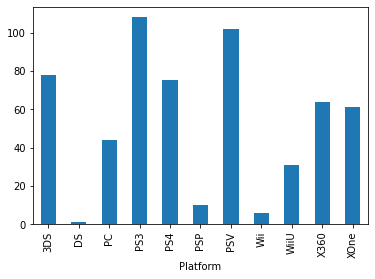

In [ ]:
pydf4['Year'].groupby(pydf4['Platform']).count().plot.bar()

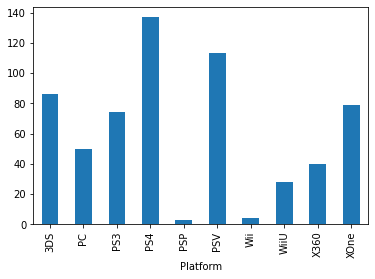

In [ ]:
pydf5['Year'].groupby(pydf5['Platform']).count().plot.bar()

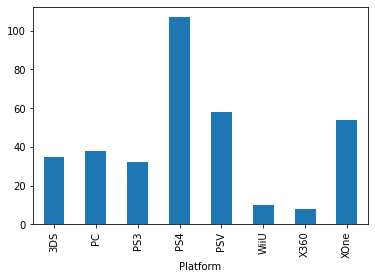

In [ ]:
pydf6['Year'].groupby(pydf6['Platform']).count().plot.bar()

# **최종 결론**

우리가 개발해야 할 게임이 출고량이 높기위해서는 NA,EU지역에서의 성공이 중요하다고 볼 수 있다.

따라서 NA,EU지역에서 인기있는 장르인 Action,Sports,Shooter 장르 중 한가지를 개발하면 좋을 것이고

구동시킬 플랫폼의 경우에는 최근 가장 많이 사용되어진 PS4, PSV 중 한가지를 선택해
개발하면 좋을 것이다.